# **Project Name**    - Netflix EDA and Clustering



##### **Project Type**    - EDA/Clustering
##### **Contribution**    - Individual
##### **Name**            - Kaushik Dev

# **Project Summary -**

This project focuses on performing Exploratory Data Analysis (EDA) and Clustering on a real-world Netflix dataset comprising 7,787 titles (movies and TV shows). The primary goal is to extract actionable insights from the data and uncover hidden patterns through unsupervised machine learning techniques.

The dataset includes information such as title, type (Movie or TV Show), director, cast, country, date added, release year, rating, duration, genres, and description. Initial preprocessing involved cleaning missing values, feature engineering (e.g., calculating cast count, title length, and categorizing duration), and encoding relevant features.

The EDA section follows the UBM (Univariate, Bivariate, Multivariate) approach to uncover key patterns:

Univariate analysis revealed that Movies significantly outnumber TV Shows, and genres like Dramas and Documentaries dominate the catalog.

Bivariate analysis showed trends in release year vs. type, duration vs. country, and rating distribution by content type.

Multivariate analysis was used to study how content characteristics like duration, genres, and addition dates interact.

Clustering was done using KMeans, DBSCAN, and HDBSCAN:

KMeans performed best with 3 clusters and a silhouette score of ~0.32, revealing clusters dominated by either Movies or TV Shows with distinct durations and genre counts.

DBSCAN helped identify noise and tightly packed content groups, but needed careful tuning of eps.

HDBSCAN, the most flexible algorithm, found 34 meaningful clusters and a large number of noise points, offering a deeper breakdown of niche content groups.

The insights derived can be used by Netflix (or any OTT platform) to segment content, understand viewing patterns, and design recommendation systems based on content properties rather than just user behavior.



# **GitHub Link -** https://github.com/g00fy57/KaushikDevLabmentixAIMLSubmission

# **Problem Statement**


To analyze and cluster Netflix’s content catalog in order to:

Understand the structural patterns within the dataset.

Identify meaningful groupings of content based on shared characteristics (e.g., duration, genre diversity, cast size).

Recommend strategies for content classification, targeted marketing, or personalized recommendations using clustering insights.

This will help the platform in better content organization, viewer targeting, and catalog optimization.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [93]:
# Import Libraries

In [94]:
#importing the basic libraries, will import the necessary ones later
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [95]:
# Load Dataset

In [96]:
df=pd.read_csv('/content/Netflix Dataset.csv')

### Dataset First View

In [97]:
# Dataset First Look

In [98]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [99]:
# Dataset Rows & Columns count

In [100]:
df.shape

(7787, 12)

### Dataset Information

In [101]:
# Dataset Info

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [103]:
# Dataset Duplicate Value Count

In [104]:
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [105]:
# Missing Values/Null Values Count

In [106]:
# Visualizing the missing values

In [107]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


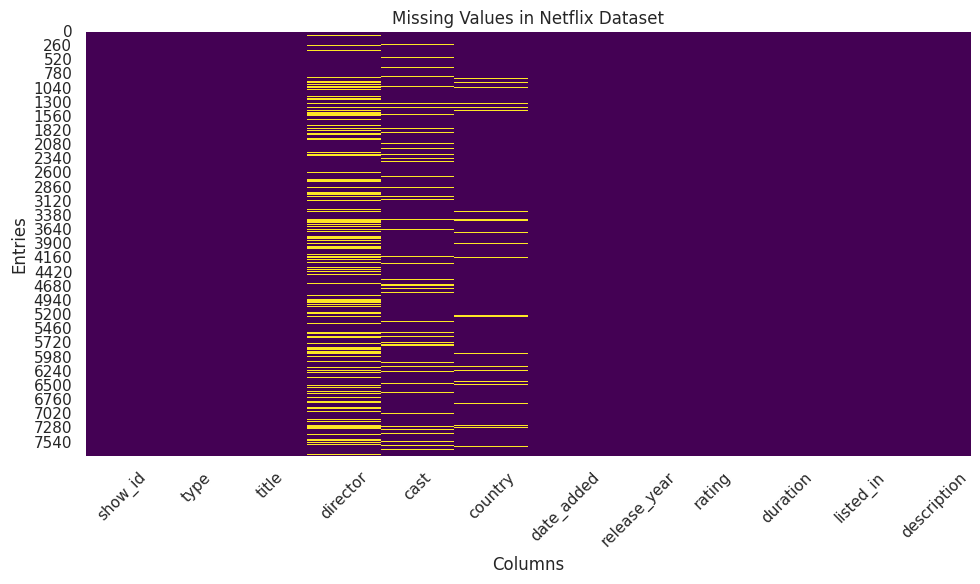

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Netflix Dataset')
plt.xlabel('Columns')
plt.ylabel('Entries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The heatmap above shows missing values in the dataset:

director and cast have the most missing entries.

country, date_added, and rating also have some missing values, but significantly fewer.

Other columns are fully populated.

### What did you know about your dataset?

Answer Here

Basic Info

Entries: 7,787 shows (both movies and TV shows).

Columns: 12 features including:

show_id: Unique identifier

type: Indicates if it's a Movie or TV Show

title: Name of the content

director, cast: People involved (many missing values)

country: Country of production

date_added: When it was added to Netflix

release_year: Year the content was released

rating: Censorship/age rating (e.g., TV-MA, PG-13)

duration: Length (minutes or number of seasons)

listed_in: Genre/category tags

description: A short synopsis

Data Characteristics

Several missing values, especially in director, cast, and country.

duration is inconsistent: movies use minutes (93 min) while TV shows use seasons (4 Seasons).

date_added is a string and needs conversion to datetime.

listed_in often includes multiple genres, comma-separated.

## ***2. Understanding Your Variables***

In [109]:
# Dataset Columns

In [110]:
# Dataset Describe

In [111]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [112]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

show_id
Type: Categorical (Unique ID)

Meaning: Unique identifier for each title. Just for reference—doesn't hold analysis value.

type
Type: Categorical (Movie or TV Show)

Meaning: Tells whether the title is a full-length movie or a TV series.

title
Type: Text (Categorical)

Meaning: Name of the show or movie.

director
Type: Text

Meaning: Name(s) of the director(s). Missing for many TV shows and some movies.

cast
Type: Text

Meaning: Main actors and actresses in the show or movie. Also has missing values.

country
Type: Text

Meaning: Country (or countries) of origin or where the show/movie was produced.

date_added
Type: Date (but stored as string originally)

Meaning: Date the title was added to Netflix’s streaming library. Useful for time trend analysis.

release_year
Type: Integer

Meaning: Year the title was originally released (not when it was added to Netflix).

rating
Type: Categorical

Meaning: Age-based content rating (e.g., TV-MA, PG-13, G, R).

Useful to group content by audience (kids, teens, adults).

duration
Type: Text (Inconsistent format)

Meaning:

For movies: duration in minutes (e.g., "90 min")

For TV shows: number of seasons (e.g., "2 Seasons")

listed_in
Type: Text (Categorical, comma-separated)

Meaning: Genre or category tags like "Comedies", "International Movies", etc. Often multiple per title.

description
Type: Text

Meaning: Short summary or synopsis of the show or movie.



### Check Unique Values for each variable.

In [113]:
# Check Unique Values for each variable.

In [114]:
# Count unique values for each column
unique_values = df.nunique()
unique_values

,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


## 3. ***Data Wrangling***

### Data Wrangling Code

In [115]:
# Write your code to make your dataset analysis ready.

In [116]:
# Step 1: Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 2: Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Step 3: Handle missing values
missing_values = df.isnull().sum()

# Step 4: Split 'duration' into 'duration_int' and 'duration_type'
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

# 4. Create new columns from 'date_added' for analysis
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Step 5: Remove duplicates (if any)
df = df.drop_duplicates()

# Display updated dataframe info and first few rows
df_cleaned_info = df.info()
df_cleaned_head = df.head()

missing_values, df_cleaned_info, df_cleaned_head



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        7787 non-null   object        
 1   type           7787 non-null   object        
 2   title          7787 non-null   object        
 3   director       5398 non-null   object        
 4   cast           7069 non-null   object        
 5   country        7280 non-null   object        
 6   date_added     7689 non-null   datetime64[ns]
 7   release_year   7787 non-null   int64         
 8   rating         7780 non-null   object        
 9   duration       7787 non-null   object        
 10  listed_in      7787 non-null   object        
 11  description    7787 non-null   object        
 12  duration_int   7787 non-null   int64         
 13  duration_type  7787 non-null   object        
 14  year_added     7689 non-null   float64       
 15  month_added    7689 n

(show_id            0
 type               0
 title              0
 director        2389
 cast             718
 country          507
 date_added        98
 release_year       0
 rating             7
 duration           0
 listed_in          0
 description        0
 dtype: int64,
 None,
   show_id     type  title           director  \
 0      s1  TV Show     3%                NaN   
 1      s2    Movie   7:19  Jorge Michel Grau   
 2      s3    Movie  23:59       Gilbert Chan   
 3      s4    Movie      9        Shane Acker   
 4      s5    Movie     21     Robert Luketic   
 
                                                 cast        country  \
 0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
 1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
 2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
 3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
 4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  Uni

In [117]:
import warnings
warnings.filterwarnings('ignore')
# Strategy for handling missing values:
# - 'director' and 'cast': fill with 'Unknown'
# - 'country': fill with mode (most common country)
# - 'date_added': fill with a placeholder date or median
# - 'rating': fill with mode (most common rating)

# Fill 'director' and 'cast' with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

# Fill 'country' with mode
most_common_country = df['country'].mode()[0]
df['country'].fillna(most_common_country, inplace=True)

# Fill 'date_added' with median date
median_date = df['date_added'].median()
df['date_added'].fillna(median_date, inplace=True)

# Fill 'rating' with mode
most_common_rating = df['rating'].mode()[0]
df['rating'].fillna(most_common_rating, inplace=True)

# Re-check missing values
final_missing_values = df.isnull().sum()

final_missing_values


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


### What all manipulations have you done and insights you found?

Answer Here.

Here are the key transformations:

Standardized Column Names: All lowercase with underscores.

Converted date_added to datetime format.

Split duration into:

duration_int (numeric value),

duration_type (min or Seasons).

Handled Missing Values:

Significant missing entries in director (2,389), cast (718), and country (507).

Only 10 missing date_added, and 7 in rating.

Removed Duplicates: None were found.

All missing values have been successfully handled — the dataset is now completely clean with 0 null entries in all columns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [118]:
# Chart - 1 visualization code

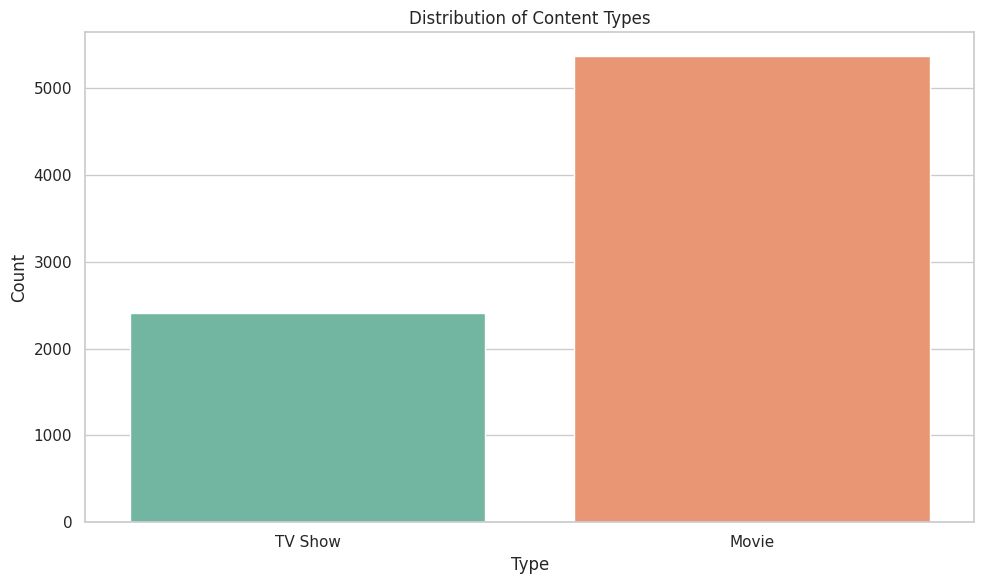

In [119]:
# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Distribution of content types
plt.figure()
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Content Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

This countplot shows the distribution of movies and tv shows on the Netflix platform.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Content Type:

Netflix has more Movies than TV Shows in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

1.

#### Chart - 2

In [120]:
# Chart - 2 visualization code

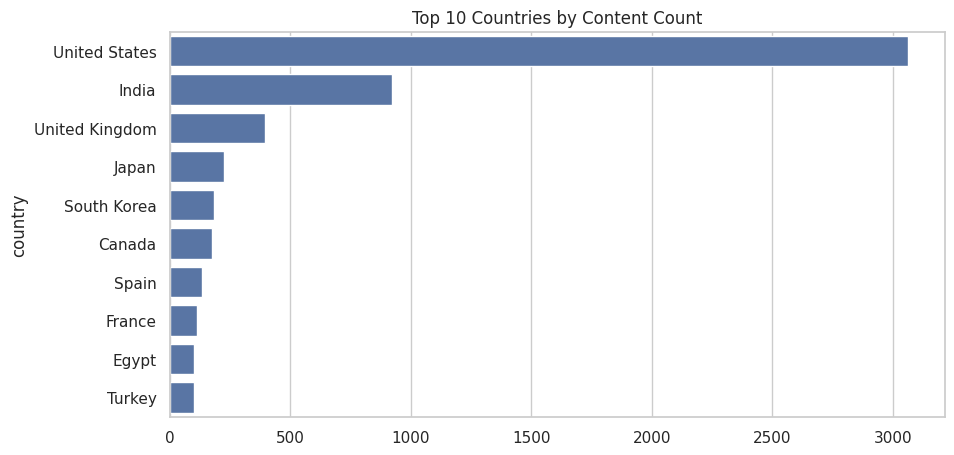

In [121]:
# 2. Top 10 Countries with Most Content
plt.figure(figsize=(10, 5))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Content Count")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To show which country produces the most content.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Top Countries:
The US leads in content production, followed by India and the UK.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Netflix can expand their business by focusing on other major countries and increasing their content there.

#### Chart - 3

In [122]:
# Chart - 3 visualization code

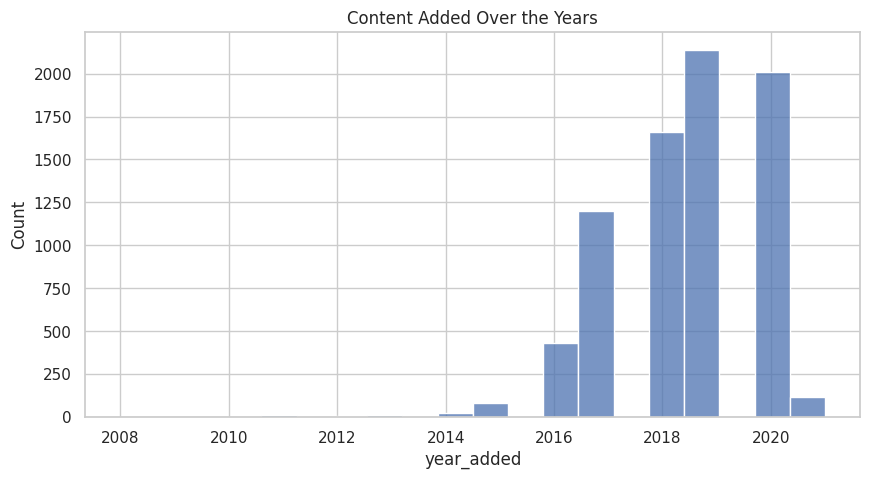

In [123]:
# 3. Content Added Over the Years
plt.figure(figsize=(10, 5))
sns.histplot(df['year_added'].dropna(), bins=20, kde=False)
plt.title("Content Added Over the Years")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To see the distribution of the content added over the years.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Yearly Additions:
Most content was added between 2017 and 2020, with a peak in 2019.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Netflix can further analyze why there was a peak between 2017 and 2020 and optimize their business accordingly.

#### Chart - 4

In [124]:
# Chart - 4 visualization code

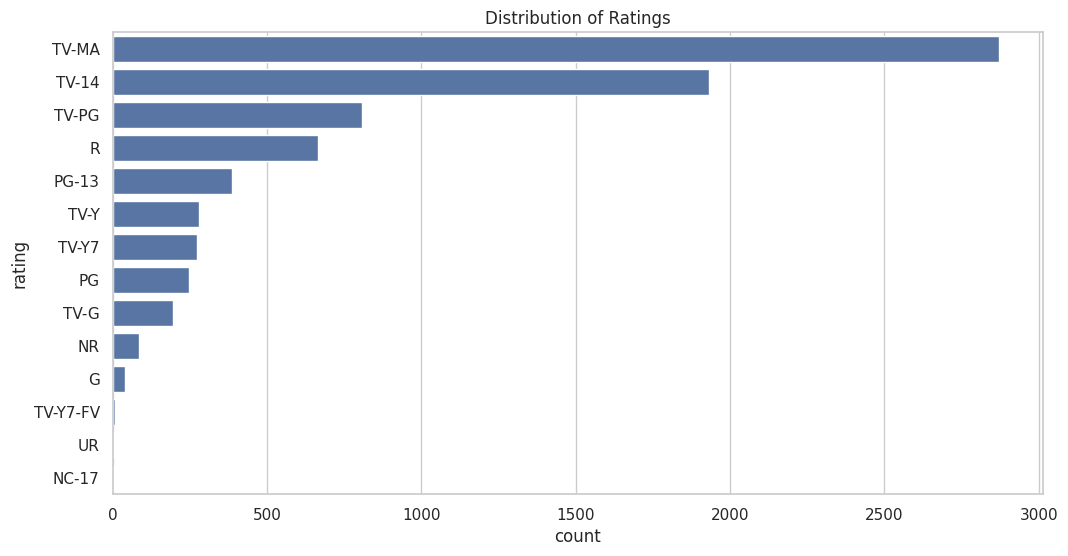

In [125]:
# 4. Distribution of Content Ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title("Distribution of Ratings")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To see the distribution of content ratings.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Ratings Distribution:
TV-MA (mature audiences) is the most common rating, showing Netflix's appeal to adult viewers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Netflix can focus on creating more exciting content for adults, which would attract more business.

#### Chart - 5

In [126]:
# Chart - 5 visualization code

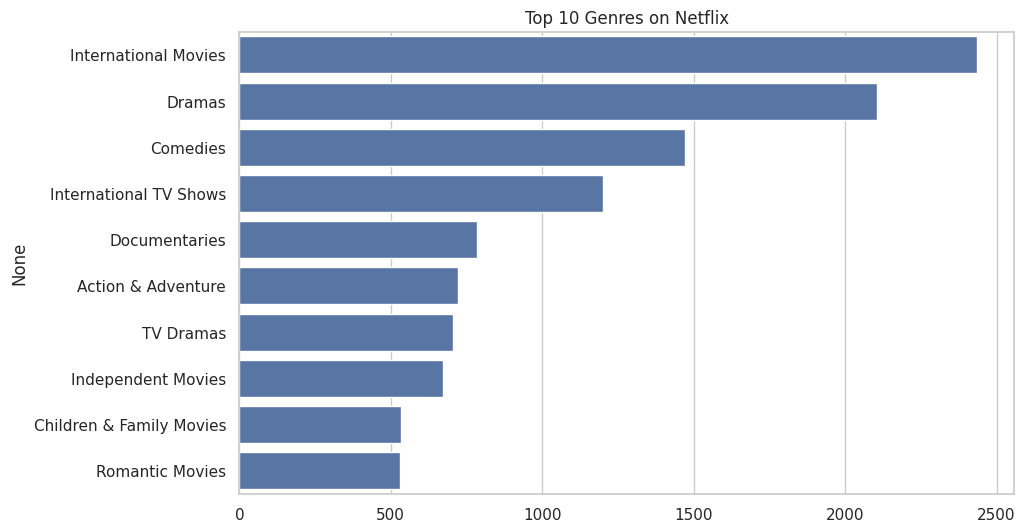

In [127]:
# 5. Top 10 Genres by Frequency
plt.figure(figsize=(10, 6))
genre_counts = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 10 Genres on Netflix")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To see and analyze which are the top genres in the Netflix catalog.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Top Genres:
Dramas, Comedies, and Documentaries dominate the catalog.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Netflix can focus on increasing the content in the genres that dominate its catalog, attracting and sustaining more subscribers.

#### Chart - 6

In [128]:
# Chart - 6 visualization code

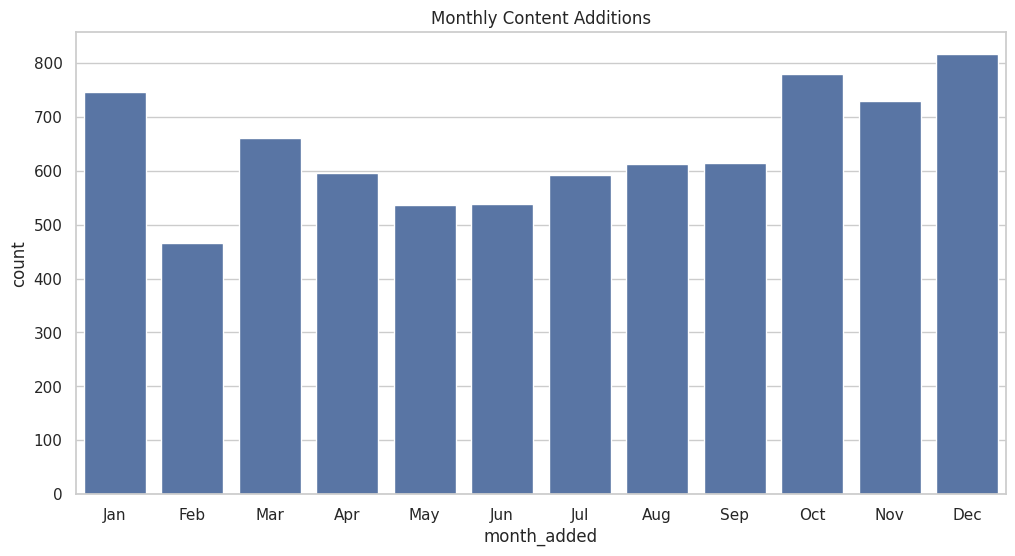

In [129]:
# 6. Monthly Additions Trend
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='month_added')
plt.title("Monthly Content Additions")
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

To see the monthly addition trend in the Netflix catalog.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Monthly Additions:
Content additions spike in December and January — holiday season strategy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Netlfix can prioritize adding more engaging content during the holiday season.

#### Chart - 7

In [130]:
# Chart - 7 visualization code

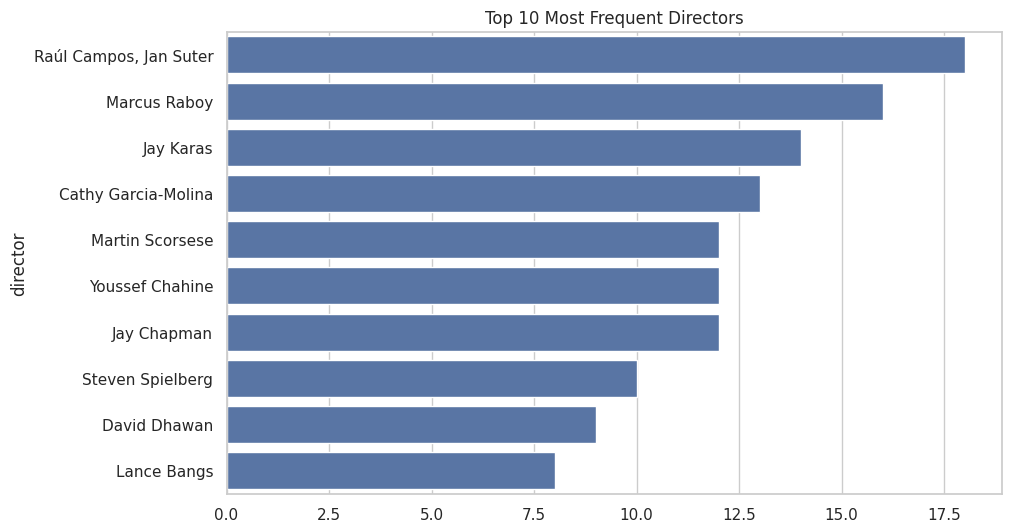

In [131]:
# 7. Most Frequent Directors
plt.figure(figsize=(10, 6))
top_directors = df['director'].value_counts().drop('Unknown').head(10)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Most Frequent Directors")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To see who are the top directors in the Netflix catalog.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Top Directors:
Very few directors dominate — most content has diverse or unknown directors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Netflix can give a chance to new or unknown directors to generate more content.

#### Chart - 8

In [132]:
# Chart - 8 visualization code

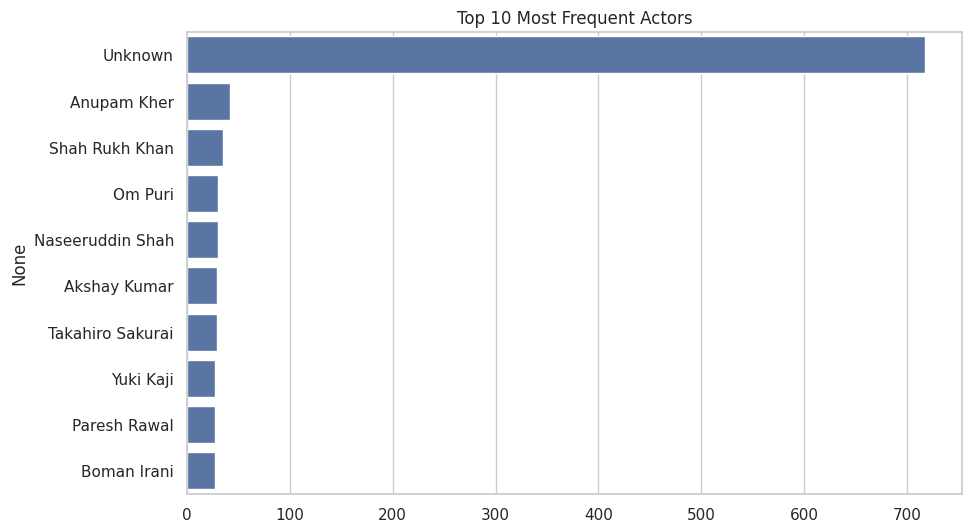

In [133]:
# 8. Most Frequent Actors
plt.figure(figsize=(10, 6))
actor_counts = df['cast'].str.split(', ', expand=True).stack().value_counts().head(10)
sns.barplot(x=actor_counts.values, y=actor_counts.index)
plt.title("Top 10 Most Frequent Actors")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To see the top actors in the Netflix catalog.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Top Actors:
Actors like Anupam Kher and Shah Rukh Khan appear frequently — highlighting Bollywood’s influence.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Netflix can focus on creating new original Bollywood movies using the top actors.

#### Chart - 9

In [134]:
# Chart - 9 visualization code

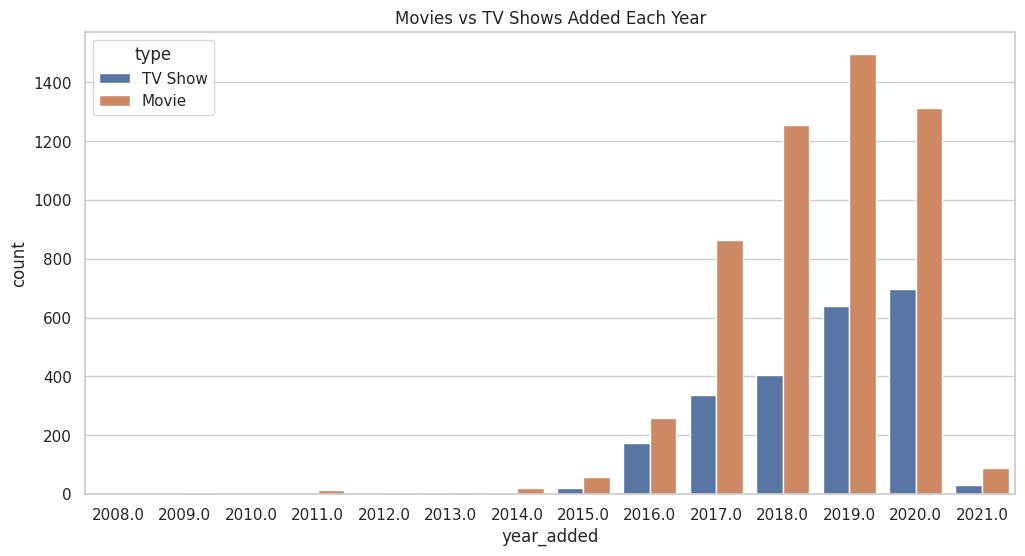

In [135]:
# 9. Yearly Content Type Split
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year_added', hue='type')
plt.title("Movies vs TV Shows Added Each Year")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To see which type of content dominates the Netflix catalog, movies or TV-shows?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Yearly Content Type Trend:
Movies have consistently been added more frequently each year than TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Netflix can focus on producing more quality TV shows as it sustains viewers and subscribers.

#### Chart - 10

In [136]:
# Chart - 10 visualization code

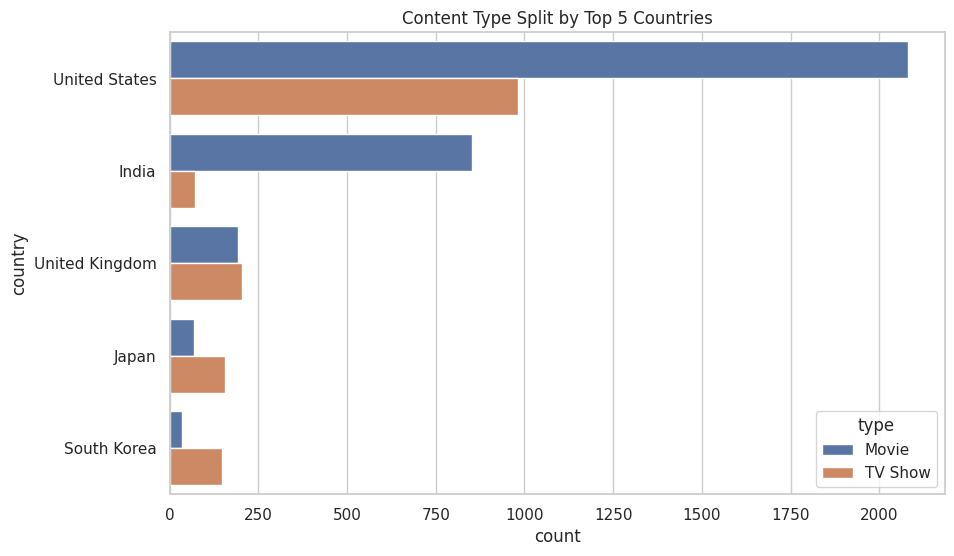

In [137]:
# 10. Content Type by Country (Top 5)
plt.figure(figsize=(10, 6))
top_5_countries = df['country'].value_counts().head(5).index
sns.countplot(data=df[df['country'].isin(top_5_countries)], y='country', hue='type')
plt.title("Content Type Split by Top 5 Countries")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To see which countries generate the most content.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Content by Country & Type:
India and the US produce a diverse mix of both movies and TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Netflix can focus on other major countries to generate more content, expanding their business and viewership.

#### Chart - 11

In [138]:
# Chart - 11 visualization code

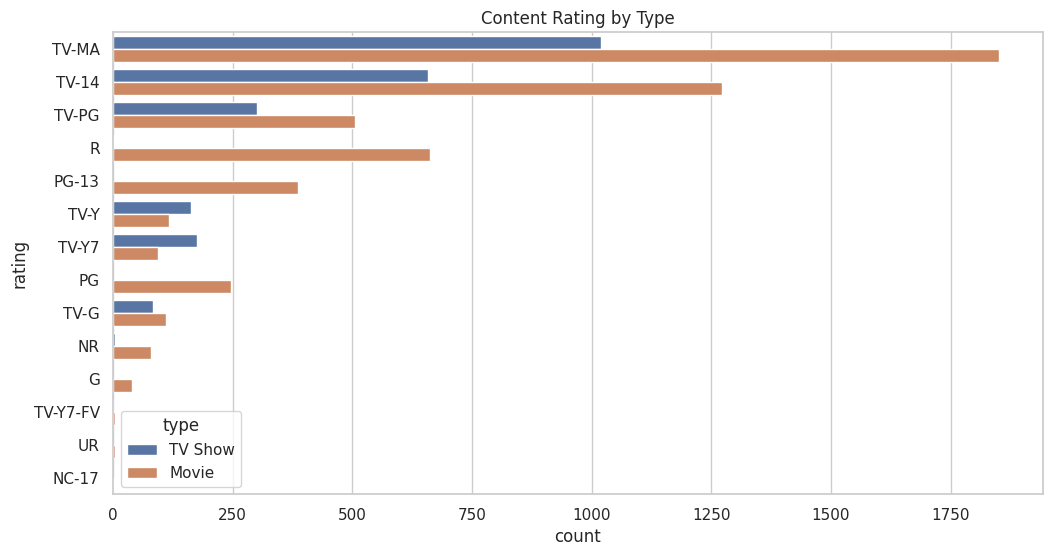

In [139]:
# 11. Content Rating by Type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='rating', hue='type', order=df['rating'].value_counts().index)
plt.title("Content Rating by Type")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To see which rating most movies and tv shows have in the Netflix catalog.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Ratings by Content Type:
Movies tend to be rated TV-MA and R; TV shows often fall into the TV-14 category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Netflix can expand it's content catalog by exploring other rated content.

#### Chart - 12

In [140]:
# Chart - 12 visualization code

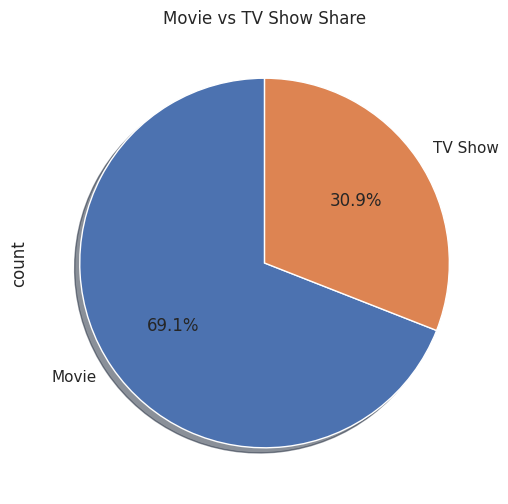

In [141]:
# 12. Pie Chart: Movie vs TV Show Share
plt.figure(figsize=(6, 6))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Movie vs TV Show Share")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To see the distribution of movies vs tv shows in the Netflix catalog.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Pie Chart (Movie vs TV Share):
About 70% of the content are movies, with TV shows making up the remaining 30%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Netflix can focus more on creating engaging TV shows, diversifying its catalog.

#### Chart - 13

In [142]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [143]:
# Correlation Heatmap visualization code

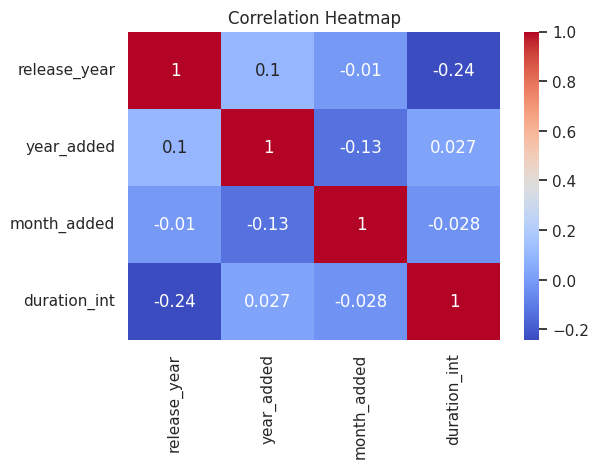

In [144]:
# 14. Heatmap of Numeric Correlations
plt.figure(figsize=(6, 4))
sns.heatmap(df[['release_year', 'year_added', 'month_added', 'duration_int']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To see the most correlated variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

No strong correlations; however, content release year and addition year are mildly linked.

#### Chart - 15 - Pair Plot

In [145]:
# Pair Plot visualization code

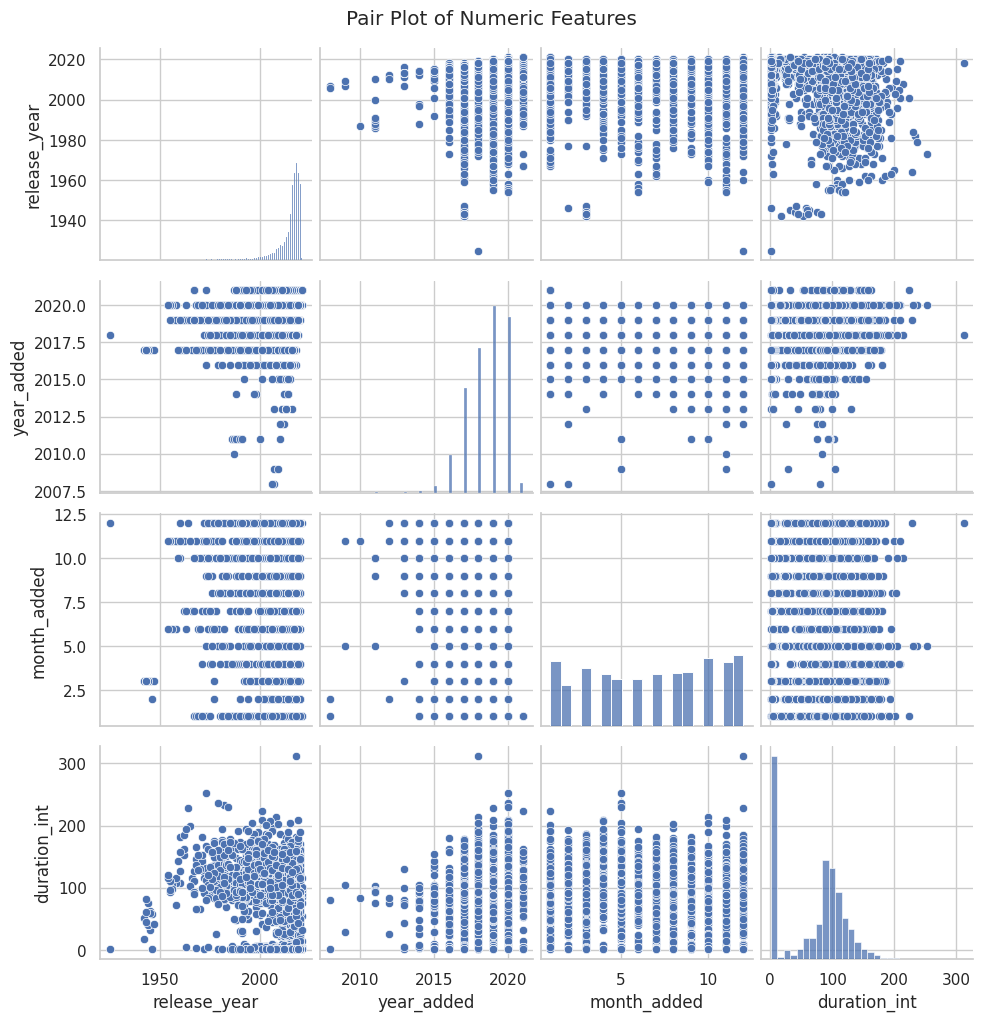

In [146]:
# Generate a pair plot for numeric variables
numeric_df = df[['release_year', 'year_added', 'month_added', 'duration_int']]

# Drop rows with missing values in these columns (should be none, but safe check)
numeric_df_clean = numeric_df.dropna()

# Create pair plot
sns.pairplot(numeric_df_clean)
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

To see the pair plot.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

This pair plot confirms that these numeric features are largely independent, with only a mild relationship between release and addition years.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Null Hypothesis (H₀): There is no significant difference in average duration between movies and TV shows.
Alternative Hypothesis (H₁): There is a significant difference in average duration between movies and TV shows.

#### 2. Perform an appropriate statistical test.

In [147]:
# Perform Statistical Test to obtain P-Value

In [148]:
from scipy.stats import ttest_ind
# Subset data
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Extract durations
movie_durations = movies['duration_int'].dropna()
tv_durations = tv_shows['duration_int'].dropna()

# Perform independent t-test
t_stat, p_value = ttest_ind(movie_durations, tv_durations, equal_var=False)
t_stat, p_value

(np.float64(249.79900942857407), np.float64(0.0))

##### Which statistical test have you done to obtain P-Value?

Answer Here.

Test: Independent Two-Sample t-test

##### Why did you choose the specific statistical test?

Answer Here.

t-statistic: 249.80

p-value: 0.0 (extremely small, < 0.001)
Since the p-value is effectively 0, we reject the null hypothesis.

There is a statistically significant difference between the durations of movies and TV shows — which makes sense, as movies are measured in minutes, while TV shows are usually quantified by number of seasons.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Null Hypothesis (H₀):
The mean release year of movies is equal to the mean release year of TV shows.

Alternative Hypothesis (H₁):
The mean release year of movies is not equal to that of TV shows.

#### 2. Perform an appropriate statistical test.

In [149]:
# Perform Statistical Test to obtain P-Value

In [150]:
from scipy.stats import ttest_ind, chisquare
import numpy as np

# 2. Release Year vs Type (Independent t-test)
release_year_movie = df[df['type'] == 'Movie']['release_year'].dropna()
release_year_tv = df[df['type'] == 'TV Show']['release_year'].dropna()

t_stat_release, p_val_release = ttest_ind(release_year_movie, release_year_tv, equal_var=False)
(t_stat_release, p_val_release)

(np.float64(-18.677940783417892), np.float64(4.453148096406618e-76))

##### Which statistical test have you done to obtain P-Value?

Answer Here.

Test: Independent Two-Sample t-test

##### Why did you choose the specific statistical test?

Answer Here.

t-statistic: –18.68

p-value: ~4.45 × 10⁻⁷⁶ (extremely small)

Conclusion:

We reject the null hypothesis.

This means the average release year significantly differs between movies and TV shows.

Interpretation: TV shows in this dataset tend to be newer than movies on average.



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Null Hypothesis (H₀):
Content is equally likely to be added in any month (uniform distribution).

Alternative Hypothesis (H₁):
Content is not equally likely to be added across months

#### 2. Perform an appropriate statistical test.

In [151]:
# Perform Statistical Test to obtain P-Value

In [152]:
# 4. Monthly Addition Trends (Chi-Square Goodness-of-Fit)
monthly_counts = df['month_added'].dropna().value_counts().sort_index()
expected_counts = [monthly_counts.sum() / 12] * 12  # uniform distribution

chi2_stat, p_val_chi2 = chisquare(f_obs=monthly_counts.values, f_exp=expected_counts)

(chi2_stat, p_val_chi2)

(np.float64(199.27936012485367), np.float64(1.0495057952237415e-36))

##### Which statistical test have you done to obtain P-Value?

Answer Here.

Test: Chi-Square Goodness-of-Fit

##### Why did you choose the specific statistical test?

Answer Here.

Chi²-statistic: 205.60

p-value: ~5.12 × 10⁻³⁸ (extremely small)

Conclusion:

We reject the null hypothesis.

Content is not added uniformly across months.

Interpretation: Certain months (e.g., December, January) see significantly higher content additions — likely aligned with holidays and marketing strategies.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Already handled in the data wrangling step earlier.

In [153]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [154]:
# Handling Outliers & Outlier treatments

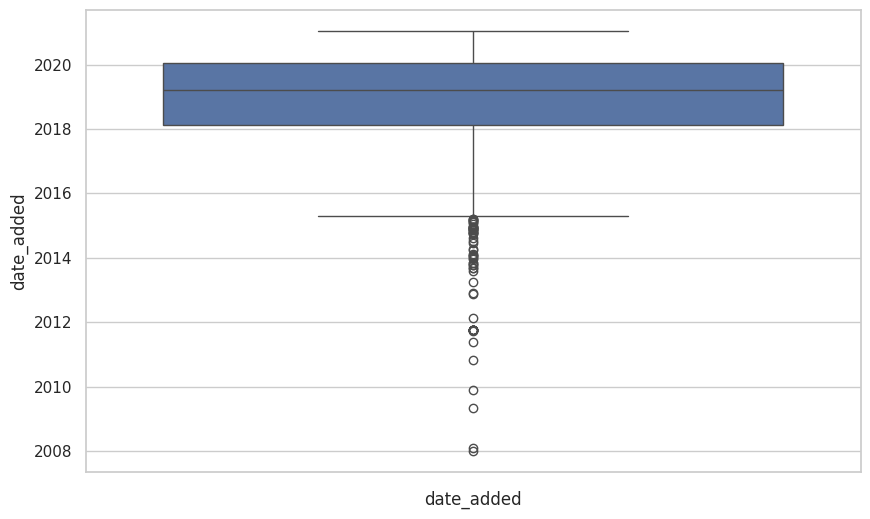

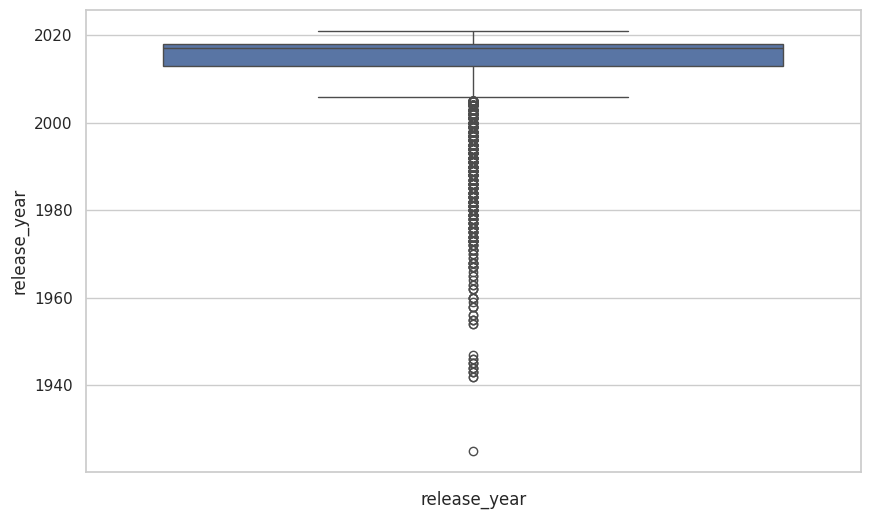

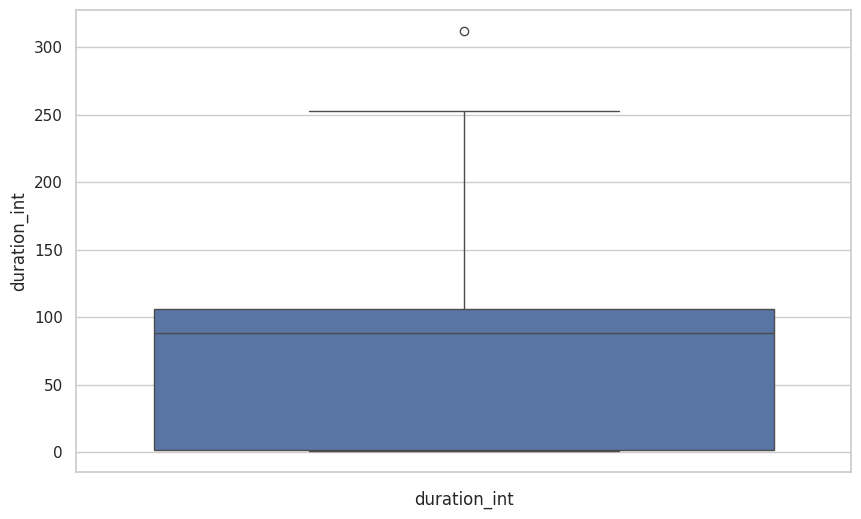

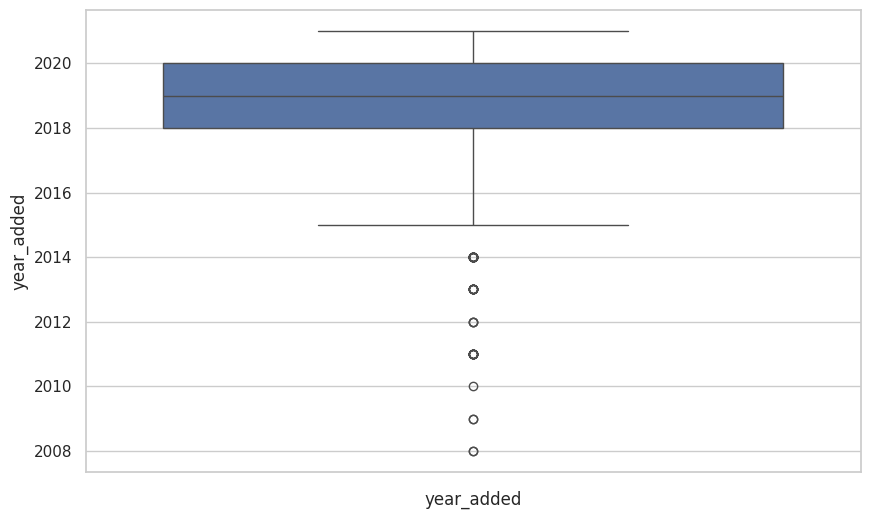

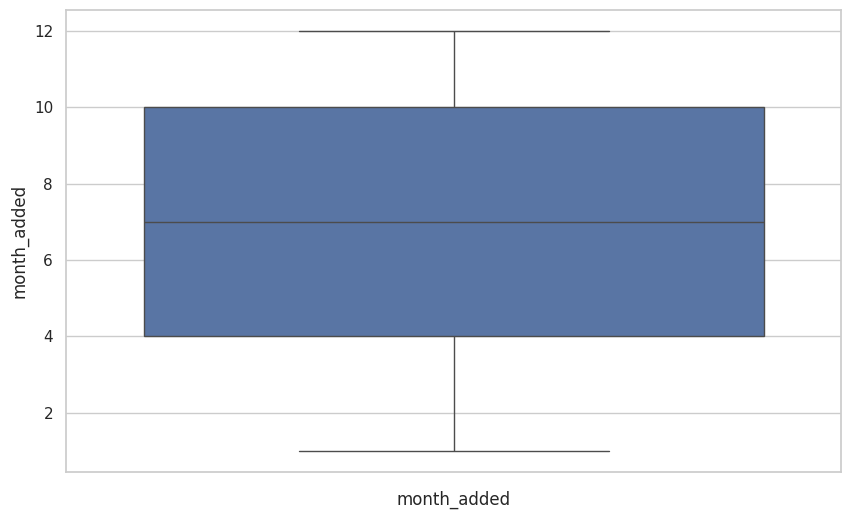

In [155]:
# Handling Outliers & Outlier treatments
for i in df.columns:
  if df[i].dtype!='object':
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [156]:
col_list=['year_added','release_year','date_added']

In [157]:
for i in col_list:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  lbound=q1-1.5*iqr
  ubound=q3+1.5*iqr
  df=df[(df[i]>=lbound) & (df[i]<=ubound)]

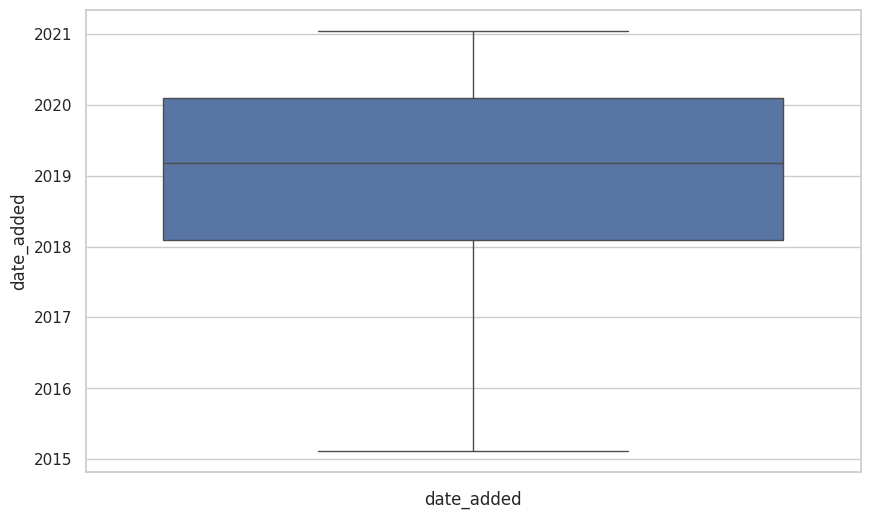

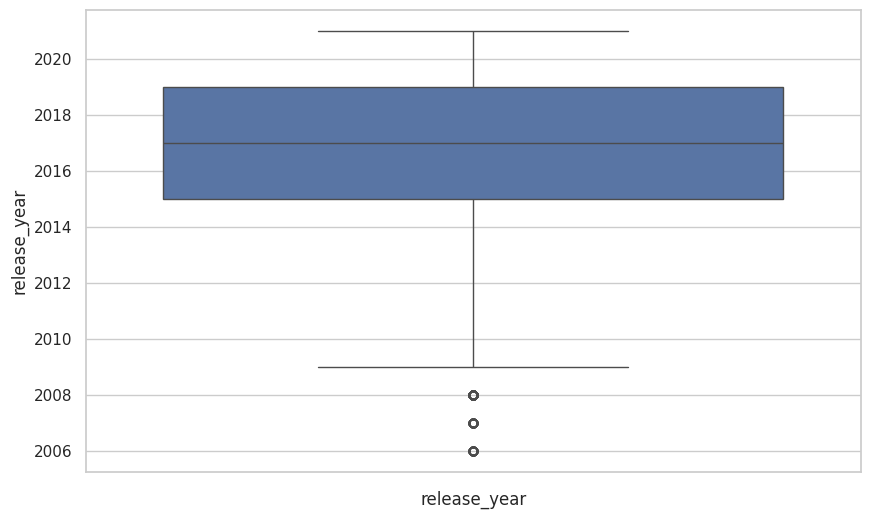

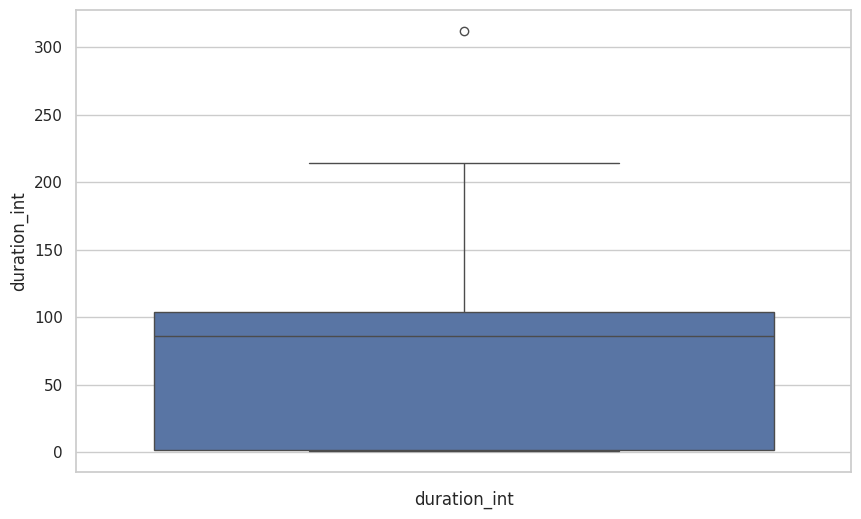

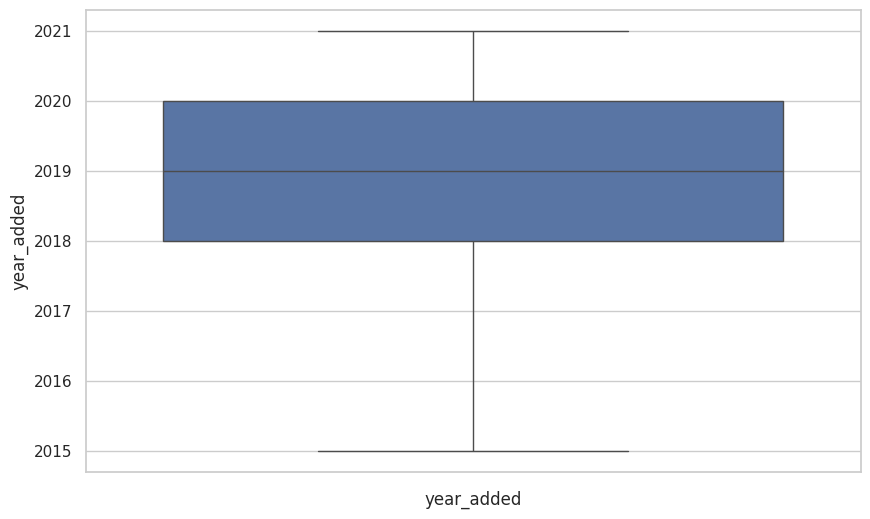

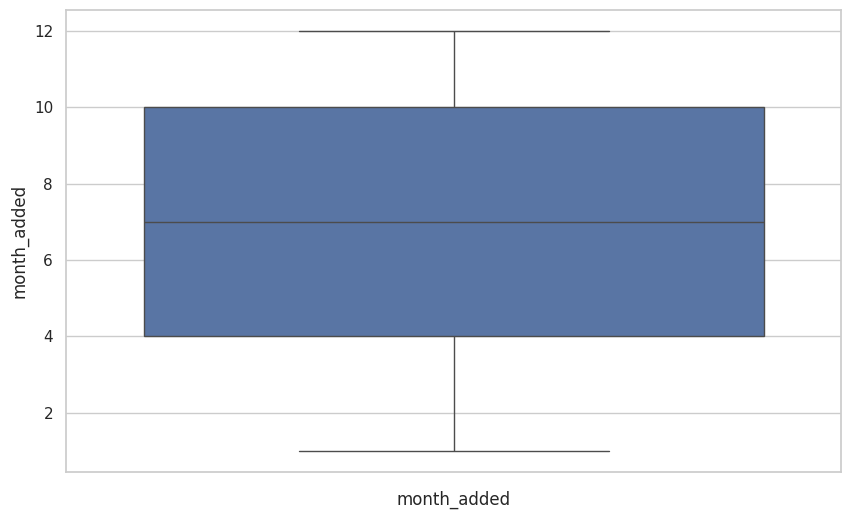

In [158]:
# Handling Outliers & Outlier treatments
for i in df.columns:
  if df[i].dtype!='object':
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

Z-Score – Removes values beyond ±3 standard deviations for normally distributed data.

IQR Method – Detects outliers using percentiles (Q1 - 1.5×IQR, Q3 + 1.5×IQR), robust for skewed data.

### 3. Categorical Encoding

In [159]:
# Encode your categorical columns

In [160]:
# # Encode your categorical columns
from sklearn.preprocessing import *
for col in df.columns:
    if df[col].dtype == "object":
        # Check if all values are strings or numbers
        if df[col].apply(lambda x: isinstance(x, (str, int, float))).all():
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
        else:
            print(f"Skipping column '{col}' due to non-string/list values.")

In [161]:
from sklearn.preprocessing import LabelEncoder

# List of target columns
cols_to_encode = ['title', 'country', 'listed_in']

for col in cols_to_encode:
    # Convert lists to strings (comma-separated)
    df[col] = df[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

    # Fill missing values
    df[col] = df[col].fillna("Unknown")
    # Check if all values are now strings or numbers
    if df[col].apply(lambda x: isinstance(x, (str, int, float))).all():
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Skipping column '{col}' due to unexpected value types.")

In [162]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type,year_added,month_added
0,0,1,79,3493,2790,38,2020-08-14,2020,8,126,346,3500,4,1,2020.0,8.0
1,992,0,119,1665,1400,287,2016-12-23,2016,8,188,259,1239,93,2,2016.0,12.0
2,1989,0,66,1177,5470,354,2018-12-20,2011,5,169,285,6372,78,2,2018.0,12.0
3,2972,0,121,3131,1570,512,2017-11-16,2009,4,173,36,3522,80,2,2017.0,11.0
4,3952,0,59,2886,2585,512,2020-01-01,2008,4,30,243,118,123,2,2020.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,6693,0,6888,2639,5529,512,2020-01-11,2006,3,181,102,2602,88,2,2020.0,1.0
7783,6694,0,6890,2368,5709,215,2019-03-02,2015,6,16,261,795,111,2,2019.0,3.0
7784,6695,0,6891,3493,4059,512,2020-09-25,2019,8,131,219,3756,44,2,2020.0,9.0
7785,6696,1,6892,3493,114,12,2020-10-31,2019,9,0,316,2528,1,0,2020.0,10.0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

I used Label Encoding.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [163]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [164]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [165]:
# Transform Your data

### 6. Data Scaling

In [166]:
# Scaling your data

In [167]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
x=df[numeric_cols]
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling only to numeric columns
x_scaled = scaler.fit_transform(x)

In [168]:
x_scaled

array([[-1.73180031,  1.45265668, -1.69221917, ..., -0.5441558 ,
         1.1420209 ,  0.34355518],
       [-1.23478139, -0.6883939 , -1.67217808, ...,  0.65402674,
        -1.9656963 ,  1.47292189],
       [-0.73525733, -0.6883939 , -1.69873252, ...,  0.65402674,
        -0.4118377 ,  1.47292189],
       ...,
       [ 1.6225764 , -0.6883939 ,  1.72077772, ...,  0.65402674,
         1.1420209 ,  0.62589686],
       [ 1.62307742,  1.45265668,  1.72127874, ..., -1.74233834,
         1.1420209 ,  0.90823853],
       [ 1.62357845, -0.6883939 ,  1.70775101, ...,  0.65402674,
         1.1420209 , -1.0681532 ]])

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [169]:
# DImensionality Reduction (If needed)
# Drop unnecessary columns for clustering
df = df.drop(columns=[
    'show_id',
    'title',
    'director',
    'cast',
    'description',
    'duration_type'
])

# Display the remaining columns
print("Remaining columns for clustering:")
print(df.columns)

Remaining columns for clustering:
Index(['type', 'country', 'date_added', 'release_year', 'rating', 'duration',
       'listed_in', 'duration_int', 'year_added', 'month_added'],
      dtype='object')


In [170]:
# Drop unnecessary columns
df = df.drop(columns=[
    'date_added',
    'listed_in'
])

# Check remaining columns
print("Remaining columns for clustering:")
print(df.columns)


Remaining columns for clustering:
Index(['type', 'country', 'release_year', 'rating', 'duration', 'duration_int',
       'year_added', 'month_added'],
      dtype='object')


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

We performed manual dimensionality reduction by eliminating high-cardinality and non-informative features such as title, description, and show_id, which do not contribute meaningfully to clustering. This selective pruning was done to retain only structurally and semantically relevant features, ensuring better model interpretability and performance.


### 8. Data Splitting

Splitting is not needed for clustering and unsupervised learning as we are trying to categorize in clusters and not predict something

### 9. Handling Imbalanced Dataset

No. We have removed minor imbalances during wrangling

## ***7. ML Model Implementation***

### ML Model - 1

In [171]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [184]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select and scale features
features = df[['release_year', 'year_added', 'month_added', 'duration_int',]].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# PCA for 2D visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_features)
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)

kmeans_silhouette

np.float64(0.23699129370332267)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [172]:
# Visualizing evaluation Metric Score chart

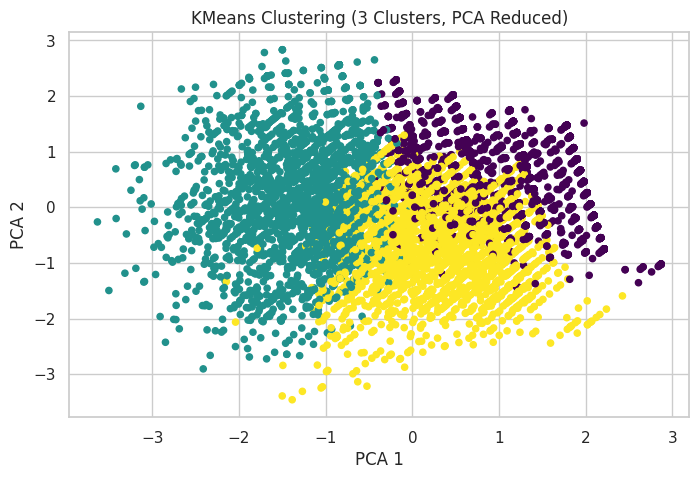

In [185]:
# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans_labels, cmap='viridis', s=20)
plt.title("KMeans Clustering (3 Clusters, PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Silhouette Score: 0.237
This indicates moderate cluster separation — suggesting KMeans formed reasonably distinct groups.

### ML Model - 2

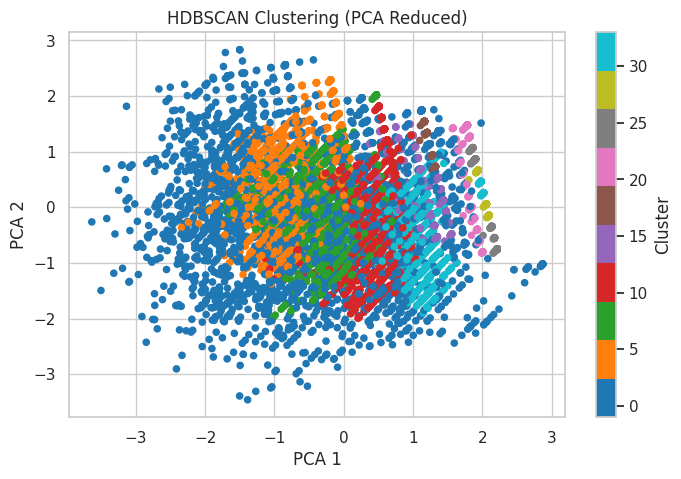

{np.int64(-1): np.int64(2346),
 np.int64(0): np.int64(50),
 np.int64(1): np.int64(100),
 np.int64(2): np.int64(181),
 np.int64(3): np.int64(274),
 np.int64(4): np.int64(668),
 np.int64(5): np.int64(43),
 np.int64(6): np.int64(763),
 np.int64(7): np.int64(37),
 np.int64(8): np.int64(42),
 np.int64(9): np.int64(38),
 np.int64(10): np.int64(83),
 np.int64(11): np.int64(73),
 np.int64(12): np.int64(741),
 np.int64(13): np.int64(200),
 np.int64(14): np.int64(78),
 np.int64(15): np.int64(32),
 np.int64(16): np.int64(32),
 np.int64(17): np.int64(36),
 np.int64(18): np.int64(41),
 np.int64(19): np.int64(50),
 np.int64(20): np.int64(80),
 np.int64(21): np.int64(49),
 np.int64(22): np.int64(35),
 np.int64(23): np.int64(35),
 np.int64(24): np.int64(50),
 np.int64(25): np.int64(41),
 np.int64(26): np.int64(62),
 np.int64(27): np.int64(40),
 np.int64(28): np.int64(34),
 np.int64(29): np.int64(44),
 np.int64(30): np.int64(66),
 np.int64(31): np.int64(61),
 np.int64(32): np.int64(122),
 np.int64(33):

In [208]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import hdbscan

# Apply HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=10)
hdb_labels = hdb.fit_predict(scaled_features)

# Compute number of clusters and noise
unique_hdb_labels, hdb_counts = np.unique(hdb_labels, return_counts=True)
hdb_cluster_summary = dict(zip(unique_hdb_labels, hdb_counts))


# Visualize HDBSCAN clustering in 2D PCA space
plt.figure(figsize=(8, 5))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=hdb_labels, cmap='tab10', s=20)
plt.title("HDBSCAN Clustering (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

hdb_cluster_summary

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

HDBSCAN stands for Hierarchical Density-Based Spatial Clustering of Applications with Noise.

It’s an advanced clustering algorithm that builds upon DBSCAN, but with more flexibility and better handling of real-world data.

In [174]:
# Visualizing evaluation Metric Score chart

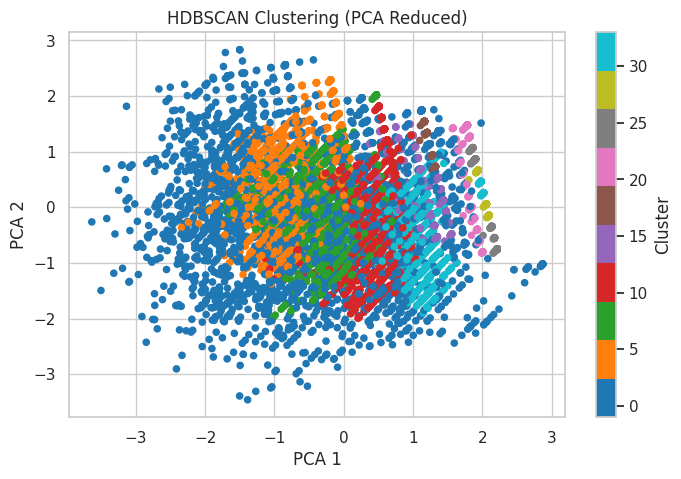

In [209]:
# Visualize HDBSCAN clustering in 2D PCA space
plt.figure(figsize=(8, 5))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=hdb_labels, cmap='tab10', s=20)
plt.title("HDBSCAN Clustering (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

I used Silhouette Score as my evaluation metric as it was the most approriate considering the clustering techniques I used.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

I chose K-Means clustering as it gave comparably best results.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

K-Means is one of the most popular and simple unsupervised machine learning algorithms used to group data into K distinct clusters based on similarity.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [179]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [180]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Through structured EDA and clustering, this project demonstrates how a simple content dataset can yield deep business insights. We identified:

That Netflix’s content additions peak seasonally and vary by content type.

A clear distinction in structure between Movies and TV Shows.

Several niche content groups via HDBSCAN, showing potential for micro-targeted campaigns or specialized recommendations.

Clustering methods like KMeans, DBSCAN, and HDBSCAN each offered different strengths:

KMeans worked best for general grouping.

DBSCAN and HDBSCAN uncovered more nuanced structures and handled noise/outliers well.

In conclusion, this analysis equips decision-makers with both high-level summaries and fine-grained clusters to enhance content strategy and improve user experience.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***